In [159]:
#import library for handling the dataset
import pandas as pd
import numpy as np

#importing library for virtualization
import matplotlib.pyplot as plt

#importing minmax for scaling the dataset
from sklearn.preprocessing import MinMaxScaler
plt.style.use('fivethirtyeight')
#importing keras for creating model
from keras import Sequential
from keras.layers import Dense, LSTM,Dropout
%matplotlib inline

In [160]:
#readin the dataset
df = pd.read_csv('AAPL.csv', index_col='Date', parse_dates=['Date'])
df.head()#getting the first 5 rows in the datset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,3.745536,4.017857,3.631696,3.997768,3.460857,133949200
2000-01-04,3.866071,3.950893,3.613839,3.660714,3.169071,128094400
2000-01-05,3.705357,3.948661,3.678571,3.714286,3.215448,194580400
2000-01-06,3.790179,3.821429,3.392857,3.392857,2.937188,191993200
2000-01-07,3.446429,3.607143,3.410714,3.553571,3.076317,115183600


In [161]:
#checking null values
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [162]:

#getting the info of the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5178 entries, 2000-01-03 to 2020-07-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5178 non-null   float64
 1   High       5178 non-null   float64
 2   Low        5178 non-null   float64
 3   Close      5178 non-null   float64
 4   Adj Close  5178 non-null   float64
 5   Volume     5178 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 283.2 KB


In [163]:
'''
using the .describe() to get the
statistical properties of the 
dataset as can be seen be low
'''
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5178.000000,5178.000000,5178.000000,5178.000000,5178.000000,5.178000e+03
mean,66.694925,67.378840,66.024528,66.732109,62.842278,1.128659e+08
std,76.799152,77.638758,76.077802,76.922891,75.824526,9.816641e+07
min,0.927857,0.942143,0.908571,0.937143,0.811282,9.835000e+06
25%,5.230357,5.321429,5.149643,5.206786,4.507500,4.552265e+07
50%,34.552858,34.932856,34.161428,34.625000,29.974771,8.493870e+07
75%,107.179998,108.000000,106.175001,107.077501,99.700114,1.494066e+08
max,411.540009,425.660004,403.299988,425.040009,425.040009,1.855410e+09


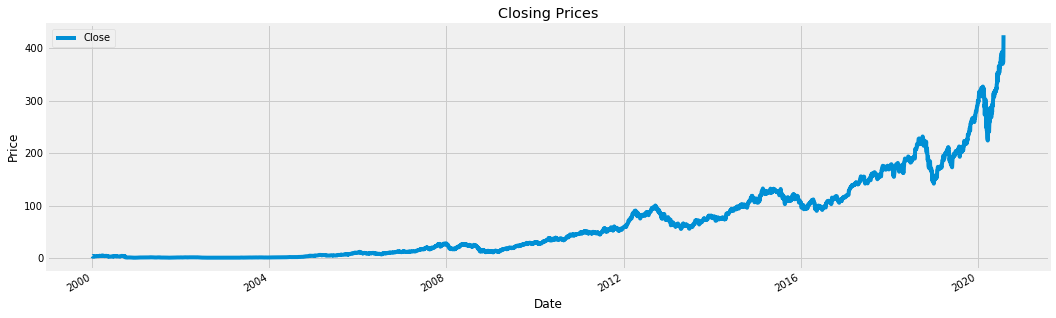

In [164]:
df[['Close']].plot(figsize=(16,5))
plt.title("Closing Prices")
plt.ylabel("Price")
plt.show()

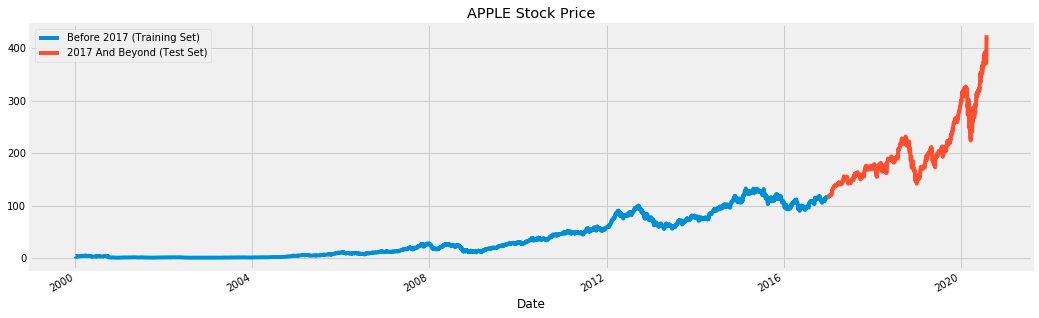

In [165]:
#We have chosen 'Close' attribute for prices. Let's see what it looks like
df['Close'][:'2016'].plot(figsize=(16,5))
df['Close']['2017':].plot(figsize=(16,5))
plt.legend(['Before 2017 (Training Set)','2017 And Beyond (Test Set)'])
plt.title('APPLE Stock Price')
plt.show()

In [166]:
df.shape
'''
shape of the dataset df.shape[0] gives the row,
df.shape[1] gives the column
'''

'\nshape of the dataset df.shape[0] gives the row,\ndf.shape[1] gives the column\n'

In [167]:
df.drop(['Adj Close'], axis =1,inplace=True)
train_data = df[:'2014'].copy()
test_data = df['2015':].copy()   
#df_tail = df.tail(7)   

In [168]:
train_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-03,3.745536,4.017857,3.631696,3.997768,133949200
2000-01-04,3.866071,3.950893,3.613839,3.660714,128094400
2000-01-05,3.705357,3.948661,3.678571,3.714286,194580400
2000-01-06,3.790179,3.821429,3.392857,3.392857,191993200
2000-01-07,3.446429,3.607143,3.410714,3.553571,115183600


In [169]:
test_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,111.389999,111.440002,107.349998,109.330002,53204600
2015-01-05,108.290001,108.650002,105.410004,106.250000,64285500
2015-01-06,106.540001,107.430000,104.629997,106.260002,65797100
2015-01-07,107.199997,108.199997,106.699997,107.750000,40105900
2015-01-08,109.230003,112.150002,108.699997,111.889999,59364500


In [170]:
'''
Scaling the dataset puts the values in a range.
The minmax scaler uses a range between 0 and 1
'''
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
train_data

array([[0.0238096 , 0.02588814, 0.02324647, 0.02592369, 0.0672496 ],
       [0.02482813, 0.0253245 , 0.02309403, 0.02306882, 0.06407726],
       [0.02347008, 0.02530572, 0.02364663, 0.02352258, 0.1001018 ],
       ...,
       [0.95369362, 0.95808356, 0.96286535, 0.95688741, 0.00962513],
       [0.95242609, 0.95092915, 0.94929205, 0.94511396, 0.01086193],
       [0.94549704, 0.94427975, 0.93307232, 0.92698802, 0.01710491]])

In [171]:
#Dividing our training set into 7 days
X_train = []
y_train = []

for i in range(7,len(train_data)):
    X_train.append(train_data[i-7:i])
    y_train.append(train_data[i,0])

In [172]:
#using numpy array because they are faster incomparison with list
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((3766, 7, 5), (3766,))

#### Building LSTM Model

In [173]:
'''
To use the model, we have to instantiate the model,
the add different layers which accept differnt parameters.
Dropout is used to aviod overfitting.
'''
model = Sequential()

#first layer
model.add(LSTM(units=64, activation='relu', return_sequences=True,
              input_shape=(X_train.shape[1],5)))
model.add(Dropout(0.3))

#second layer
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.25))

#third layer
model.add(LSTM(units=64, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
#fourth layer     
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))
#last layer       
model.add(Dense(units=1))

In [174]:
#the .summary() method displays the details of the arc.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 7, 64)             17920     
_________________________________________________________________
dropout_25 (Dropout)         (None, 7, 64)             0         
_________________________________________________________________
lstm_26 (LSTM)               (None, 7, 80)             46400     
_________________________________________________________________
dropout_26 (Dropout)         (None, 7, 80)             0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 7, 64)             37120     
_________________________________________________________________
dropout_27 (Dropout)         (None, 7, 64)             0         
_________________________________________________________________
lstm_28 (LSTM)               (None, 120)               88800     
__________

In [175]:
#compiling our model allow us to chose the optimizer,loss and other parameters
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [176]:
#training the LSTM model with 10 epochs and batch size of 32
model.fit(X_train,y_train, epochs=10,batch_size=32)

Epoch 1/10
3766/3766 [==============================] - 13s 3ms/step - loss: 0.0209 - acc: 2.6553e-04
Epoch 2/10
3766/3766 [==============================] - 5s 1ms/step - loss: 0.0039 - acc: 5.3107e-04
Epoch 3/10
3766/3766 [==============================] - 5s 1ms/step - loss: 0.0033 - acc: 5.3107e-04A: 1s - loss: 0.0035 - acc: 7.6220e-0 - ETA: 1s - loss: 0
Epoch 4/10
3766/3766 [==============================] - 5s 1ms/step - loss: 0.0030 - acc: 5.3107e-04
Epoch 5/10
3766/3766 [==============================] - 5s 1ms/step - loss: 0.0028 - acc: 5.3107e-04
Epoch 6/10
3766/3766 [==============================] - 5s 1ms/step - loss: 0.0027 - acc: 5.3107e-04
Epoch 7/10
3766/3766 [==============================] - 5s 1ms/step - loss: 0.0029 - acc: 5.3107e-04
Epoch 8/10
3766/3766 [==============================] - 5s 1ms/step - loss: 0.0024 - acc: 5.3107e-04
Epoch 9/10
3766/3766 [==============================] - 5s 1ms/step - loss: 0.0027 - acc: 5.3107e-04
Epoch 10/10
3766/3766 [==========

In [177]:
test_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,111.389999,111.440002,107.349998,109.330002,53204600
2015-01-05,108.290001,108.650002,105.410004,106.250000,64285500
2015-01-06,106.540001,107.430000,104.629997,106.260002,65797100
2015-01-07,107.199997,108.199997,106.699997,107.750000,40105900
2015-01-08,109.230003,112.150002,108.699997,111.889999,59364500


In [178]:
#test = test.drop(['Date','Adj Close'], axis=1)
test = scaler.fit_transform(test_data)

In [179]:
#breaking the test data into 7 days as well
X_test = []
y_test = []

for i in range(7, test.shape[0]):
    X_test.append(test[i-7:i])
    y_test.append(test[i,0])

In [180]:
X_test,y_test = np.array(X_test), np.array(y_test)
X_test.shape,y_test.shape

((1398, 7, 5), (1398,))

In [181]:
#predicting the 7 days price
y_pred = model.predict(X_test)

In [182]:
scaler.scale_[0]

0.0031100328792987002

In [183]:
scale = 1/scaler.scale_[0]

In [184]:
#Getting the original price before scaling
y_pred = y_pred * scale
y_test = y_test* scale

In [185]:
y_pred

array([[ 27.732498],
       [ 26.587158],
       [ 28.80668 ],
       ...,
       [279.984   ],
       [276.83224 ],
       [273.0698  ]], dtype=float32)

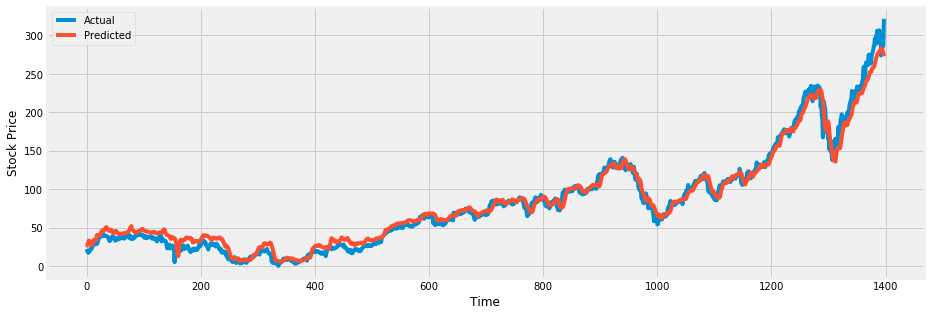

In [186]:
plt.figure(figsize=(14,5))
plt.plot(y_test,label='Actual')
plt.plot(y_pred,label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
#plt.xlim('2018-01', '2020-08')
plt.show()

In [187]:
#importing mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error
'''
    calculating the root mean_squared_error
    of the regression problem, a lower number
    tells us how well our model is doing as we
    experimentally train our model.
'''
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(round(rmse,3))

8.747
